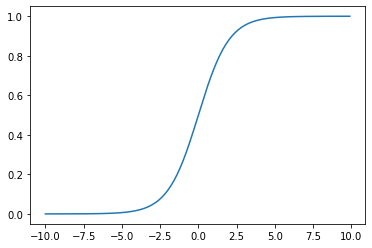

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-10,10,0.1)
sig = 1/(1+np.power(np.e,-x))
plt.plot(x,sig)
plt.show()


In [2]:
def sigmoid(z):
    return 1.0 / (np.exp(-z))


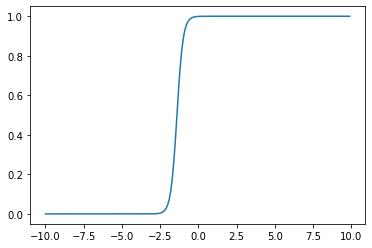

In [3]:
x = np.arange(-10,10,0.1)
lop = 5*x + 7
conn_sig = 1/(1+np.power(np.e,-lop))
plt.plot(x,conn_sig)
plt.show()


In [ ]:
logestic regression
logestic : we use logistic or sigmoid function
regression : we use the linear regression equation to get the final prediction

In [4]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.drop(["parch","embarked","class","who","alive","alone","adult_male","embark_town","fare"],axis=1,inplace=True)


In [7]:
df.head()

,survived,pclass,sex,age,sibsp,deck
0,0,3,male,22.0,1,NaN
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,NaN
3,1,1,female,35.0,1,C
4,0,3,male,35.0,0,NaN


In [8]:
df.drop('deck',inplace=True,axis=1)

In [9]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


In [11]:
df['age'].mean()

29.69911764705882

In [12]:
df['age'].fillna(29,inplace=True)

In [13]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
dtype: int64

In [ ]:
Sex-- text categorical col--encode
a. pandas get_dummies

In [14]:
import pandas as pd
gender = pd.get_dummies(df["sex"],drop_first=True)

In [15]:
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [16]:
df.drop('sex',inplace=True,axis=1)

In [17]:
df.head(2)

,survived,pclass,age,sibsp
0,0,3,22.0,1
1,1,1,38.0,1


In [18]:
new_df = pd.concat([df,gender],axis=1)


In [19]:
new_df.head()

,survived,pclass,age,sibsp,male
0,0,3,22.0,1,1
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1


In [20]:
x=new_df.iloc[:,1:]

In [21]:
x.head(2)

,pclass,age,sibsp,male
0,3,22.0,1,1
1,1,38.0,1,0


In [22]:
y = new_df.iloc[:,0]


In [23]:
y.head(2)

0    0
1    1
Name: survived, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [25]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [26]:
import time
%time log.fit(x_train,y_train)

Wall time: 379 ms


LogisticRegression()

In [28]:
y_pred= log.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix
conf_matrics = confusion_matrix(y_test,y_pred)

In [30]:
conf_matrics

array([[90, 15],
       [19, 55]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
macro avg : will compute the metric independently for each class and then take the average(treats all classes equally)
    p(class1) = 0.5,p(class2) = 0.5,class3 = 0.5
    0.5+0.5+0.5/3